In [157]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import t, norm, chi2,gamma
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency, kendalltau, spearmanr, weightedtau,pointbiserialr
import seaborn as sns


In [158]:
df=pd.read_csv('voitures1.csv') 
df.head()

,Modèle,État,Année-Modèle,Marque,Origine,Kilométrage,Première main,Nombre de portes,carburant,Ville,boite,puissance,price
0,Tiguan,NaN,2012.0,Volkswagen,Dédouanée,194999.5,NaN,NaN,Diesel,Fquih Ben Saleh,NaN,8 CV,210000.0
1,190,Très bon,2005.0,Mercedes-Benz,Dédouanée,274999.5,Non,5.0,NaN,Dakhla,Manuelle,8 CV,55000.0
2,Lodgy,Très bon,2012.0,Dacia,WW au Maroc,2499.5,Oui,5.0,Diesel,Ouled Teïma,NaN,6 CV,87000.0
3,2,Excellent,2008.0,Mazda,WW au Maroc,124999.5,Oui,5.0,NaN,El Jadida,Manuelle,8 CV,54000.0
4,Kadjar,Excellent,2016.0,Renault,WW au Maroc,82499.5,Oui,5.0,NaN,Casablanca,Manuelle,6 CV,159000.0


In [159]:
df1=df.copy()


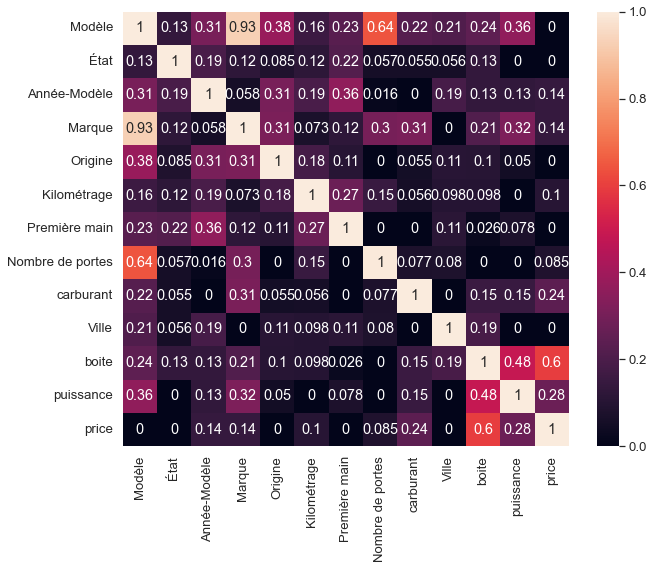

In [160]:
data=df1.copy()
corr_matrix = np.zeros((len(data.columns), len(data.columns)))
for i, col1 in enumerate(data.columns):
    for j, col2 in enumerate(data.columns):
        confusion_matrix = pd.crosstab(data[col1], data[col2])
        corr_matrix[i, j] = cramers_v(confusion_matrix.values)

# plot heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, annot=True, xticklabels=data.columns, yticklabels=data.columns)
plt.show()

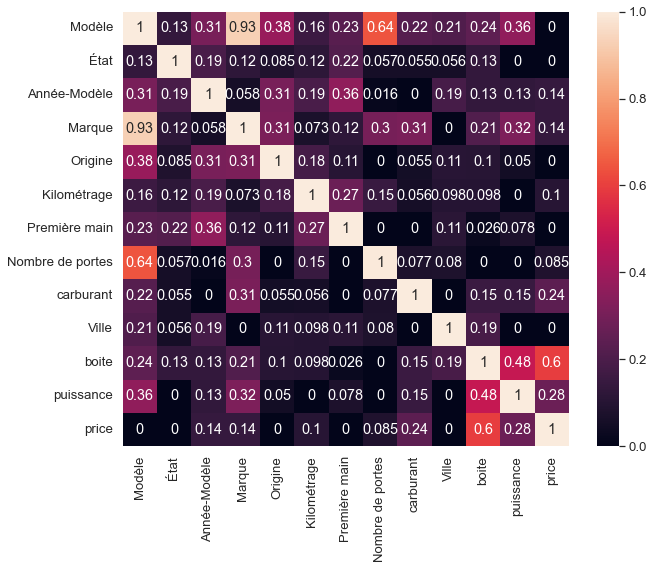

In [161]:
corr_matrix = np.zeros((len(data.columns), len(data.columns)))
for i, col1 in enumerate(data.columns):
    for j, col2 in enumerate(data.columns):
        confusion_matrix = pd.crosstab(data[col1], data[col2])
        corr_matrix[i, j] = cramers_v(confusion_matrix.values)

# plot heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, annot=True, xticklabels=data.columns, yticklabels=data.columns)
plt.show()

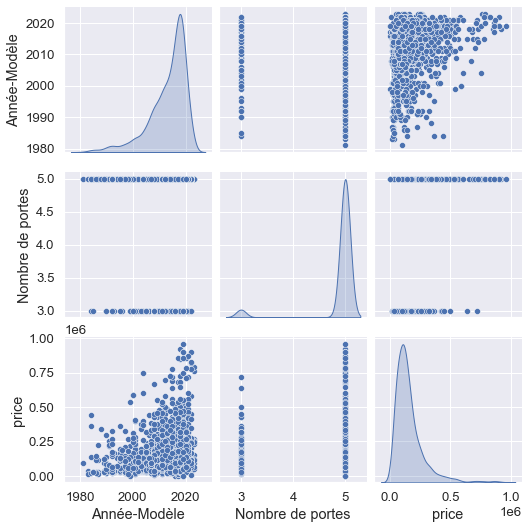

In [162]:
sns.pairplot(data, diag_kind="kde", height=2.5)


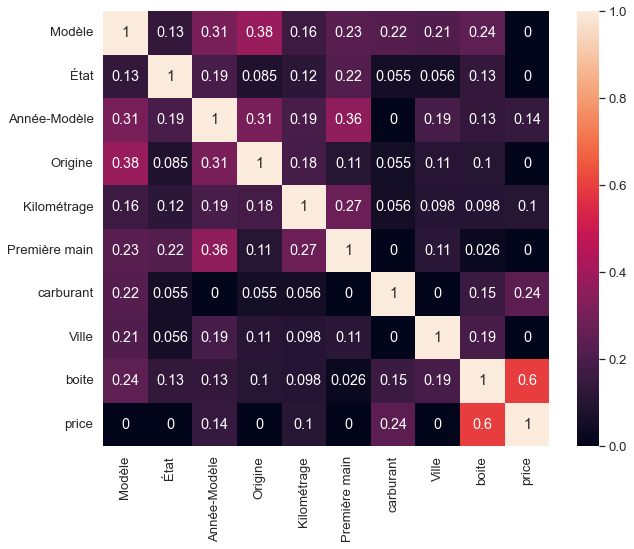

In [163]:
data = data.drop(['Marque','Nombre de portes','puissance'], axis=1)
corr_matrix = np.zeros((len(data.columns), len(data.columns)))
for i, col1 in enumerate(data.columns):
    for j, col2 in enumerate(data.columns):
        confusion_matrix = pd.crosstab(data[col1], data[col2])
        corr_matrix[i, j] = cramers_v(confusion_matrix.values)

# plot heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, annot=True, xticklabels=data.columns, yticklabels=data.columns)
plt.show()

In [164]:
data['Kilométrage'] = data['Kilométrage'].replace('Plus de 500 000', 500000.0)

# convert the column to float
data['Kilométrage'] = data['Kilométrage'].astype(float)
data['Année-Modèle'] = data['Année-Modèle'].astype(float)
data['price'] = data['price'].astype(float)

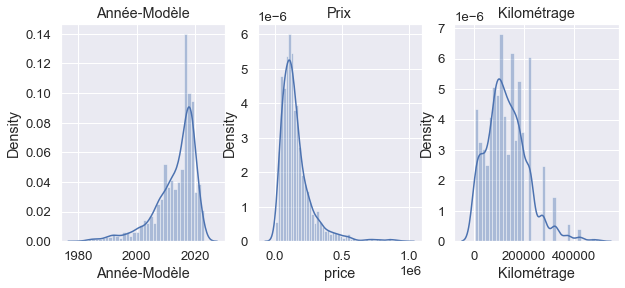

In [165]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Plot the three distplots using the axes
sns.distplot(data["Année-Modèle"], ax=axs[0])
sns.distplot(data.price, ax=axs[1])
sns.distplot(data.Kilométrage, ax=axs[2])

# Set titles for the subplots
axs[0].set_title('Année-Modèle')
axs[1].set_title('Prix')
axs[2].set_title('Kilométrage')

# Display the plot
plt.show()

Text(0.5, 1.0, 'Clio Price Distribution')

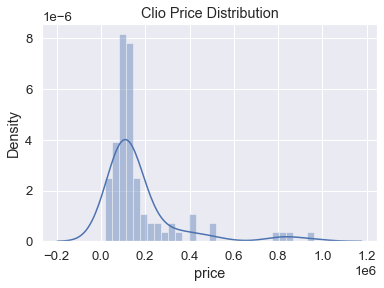

In [166]:
clio = df.loc[data.Modèle=='Clio']
sns.distplot(clio.price).set_title('Clio Price Distribution')


In [167]:
mean_target = data.groupby('Modèle')['price'].mean()
data['Modèle_mean_target'] = data['Modèle'].map(mean_target)


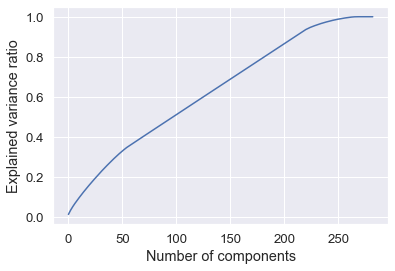

In [168]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = data.dropna()  # drops rows with missing or invalid values
data['Année-Modèle'] = data['Année-Modèle'].fillna(data['Année-Modèle'].mean())  # fills missing values with the mean of the column
data['Kilométrage'] = data['Kilométrage'].fillna(data['Kilométrage'].median())
X = data.drop('price', axis=1)  # features
y = data['price']               # target variable
X_encoded = pd.get_dummies(X)  # one-hot encoding
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()

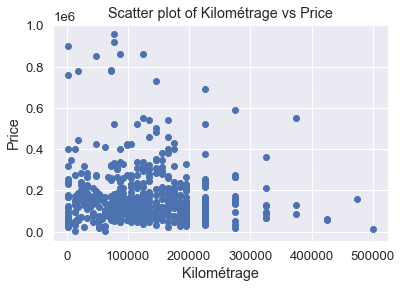

In [169]:
plt.scatter(data["Kilométrage"], data["price"])
plt.xlabel("Kilométrage")
plt.ylabel("Price")
plt.title("Scatter plot of Kilométrage vs Price")
plt.show()

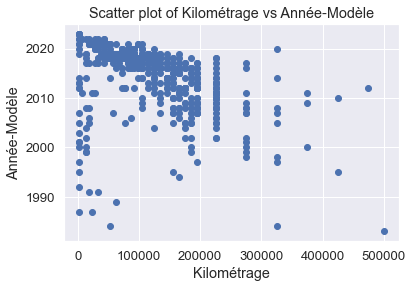

In [170]:
plt.scatter(data["Kilométrage"], data["Année-Modèle"])
plt.xlabel("Kilométrage")
plt.ylabel("Année-Modèle")
plt.title("Scatter plot of Kilométrage vs Année-Modèle")
plt.show()

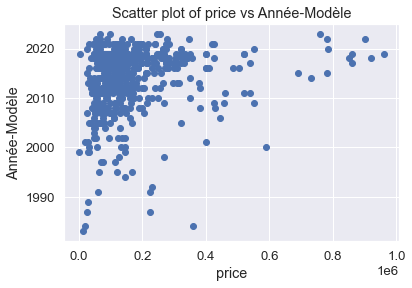

In [171]:
plt.scatter(data["price"], data["Année-Modèle"])
plt.xlabel("price")
plt.ylabel("Année-Modèle")
plt.title("Scatter plot of price vs Année-Modèle")
plt.show()

In [172]:
mean_target = data.groupby('Ville')['price'].mean()
data['Ville_mean_target'] = data['Ville'].map(mean_target)


In [173]:
data = data.drop(['Ville', 'Modèle'], axis=1)

In [174]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['État',  'Origine',  'Première main',
       'carburant', 'boite']:
    data[i] = le.fit_transform(data[i])
# perform label encoding on 'team' column


# view DataFrame
data.head()

,État,Année-Modèle,Origine,Kilométrage,Première main,carburant,boite,price,Modèle_mean_target,Ville_mean_target
11,4,2019.0,3,62499.5,1,0,1,95000.0,138069.014085,171941.176471
15,1,2012.0,3,114999.5,1,0,1,100000.0,141277.777778,100000.000000
29,1,2014.0,3,12499.5,0,0,1,95000.0,150566.666667,198125.000000
30,3,2014.0,3,97499.5,1,0,0,129999.0,88499.500000,208176.093407
35,1,2015.0,3,194999.5,0,0,1,110000.0,94583.333333,174826.296296


In [175]:
data.columns

Index(['État', 'Année-Modèle', 'Origine', 'Kilométrage', 'Première main',
       'carburant', 'boite', 'price', 'Modèle_mean_target',
       'Ville_mean_target'],
      dtype='object')

In [176]:
data["Ville_mean_target"].value_counts()

208176.093407    182
174826.296296     54
171941.176471     51
198125.000000     40
133482.758621     29
146500.000000     28
135625.000000     24
164750.000000     16
89392.857143      14
137142.857143     14
89333.333333      12
102800.000000     10
170750.000000      8
144857.142857      7
91000.000000       6
120000.000000      6
162166.666667      6
100000.000000      3
113500.000000      2
58500.000000       2
43000.000000       2
275000.000000      2
129000.000000      2
162500.000000      2
102000.000000      1
105000.000000      1
58000.000000       1
177000.000000      1
360000.000000      1
70000.000000       1
113000.000000      1
53000.000000       1
235000.000000      1
14000.000000       1
49000.000000       1
95000.000000       1
59000.000000       1
200000.000000      1
230000.000000      1
400000.000000      1
130000.000000      1
32000.000000       1
Name: Ville_mean_target, dtype: int64

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the data into a pandas dataframe
X = data.drop('price', axis=1)  # features
y = data['price']       
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Fit the model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the labels for the testing data
y_pred = model.predict(X_test)

# Compute the R-squared score for the model
score = model.score(X_test, y_test)
score1 = model.score(X_train, y_train)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('R-squared score:', score)
print('R-squared score:', score1)


Coefficients: [-3.91725246e+03  8.07312538e+02 -8.21216379e+03 -8.89593163e-02
 -4.14210842e+03 -8.65707278e+03 -1.19929568e+05  5.61971850e-01
  6.13409342e-01]
Intercept: -1535176.622033621
R-squared score: 0.40287661709647105
R-squared score: 0.41300718300975203


In [178]:
import statsmodels.api as sm
model1 = sm.OLS(y_train, X_train).fit()

# Print the summary of the model
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.766
Model:                            OLS   Adj. R-squared (uncentered):              0.761
Method:                 Least Squares   F-statistic:                              153.7
Date:                Tue, 28 Mar 2023   Prob (F-statistic):                   2.30e-127
Time:                        22:23:29   Log-Likelihood:                         -5610.4
No. Observations:                 432   AIC:                                  1.124e+04
Df Residuals:                     423   BIC:                                  1.128e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [179]:
data.head()

,État,Année-Modèle,Origine,Kilométrage,Première main,carburant,boite,price,Modèle_mean_target,Ville_mean_target
11,4,2019.0,3,62499.5,1,0,1,95000.0,138069.014085,171941.176471
15,1,2012.0,3,114999.5,1,0,1,100000.0,141277.777778,100000.000000
29,1,2014.0,3,12499.5,0,0,1,95000.0,150566.666667,198125.000000
30,3,2014.0,3,97499.5,1,0,0,129999.0,88499.500000,208176.093407
35,1,2015.0,3,194999.5,0,0,1,110000.0,94583.333333,174826.296296


MSE: 28464504771.92651
R2 score: 0.07092169145308469


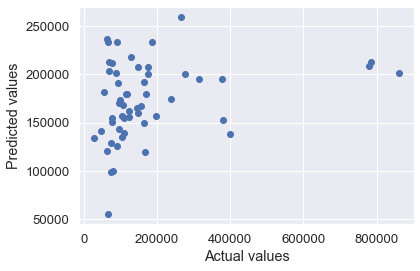

In [180]:
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import KFold, train_test_split
from sklearn.neural_network import MLPRegressor

def NNRegressor(data):
    X = pd.DataFrame(data.drop(['price'],axis=1))
    y = pd.DataFrame(data['price'])
    # print(X.head)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 1)
    mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)
    mlp.fit(X_train, y_train)
    
    y_pred = mlp.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("MSE:", mse)
    print("R2 score:", r2)
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.show()
NNRegressor(data)

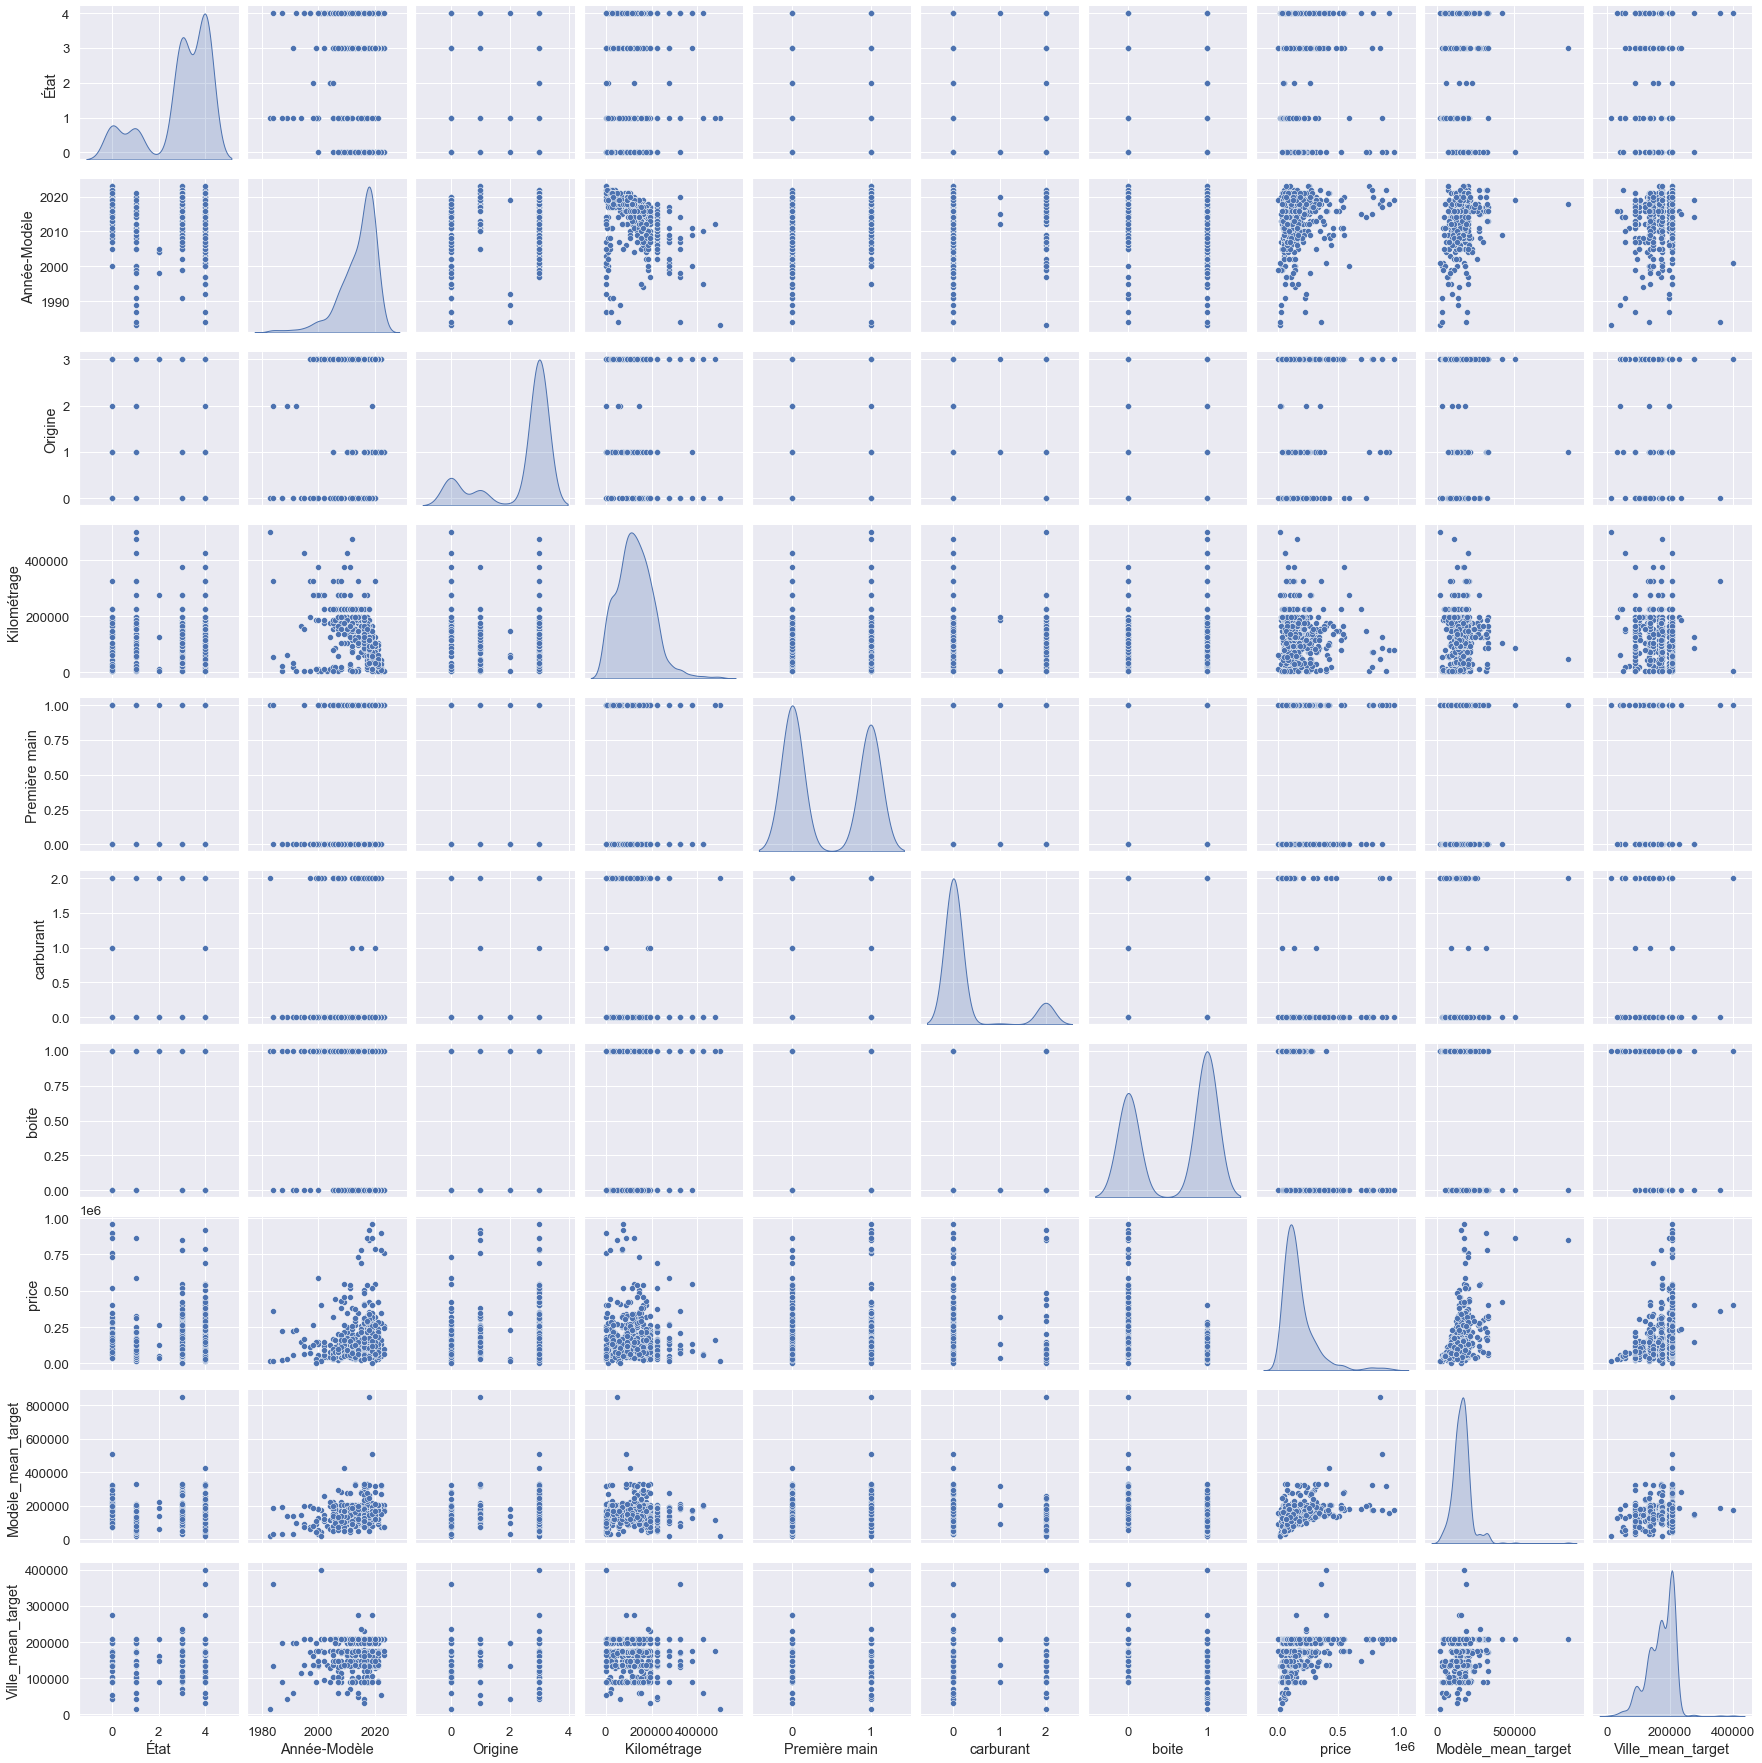

In [181]:
sns.pairplot(data, diag_kind="kde", height=2.5)


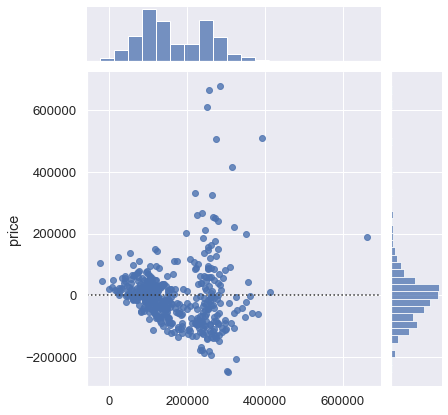

In [192]:
y_pred=model1.predict(X_train)
sns.jointplot(x=y_pred, y=y_train, kind='resid')


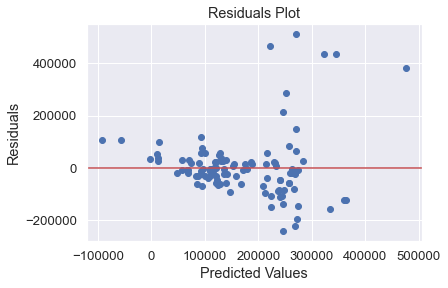

In [187]:
residuals = y_test - y_pred

# Plot the residuals against the predicted values
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residuals Plot")
plt.show()

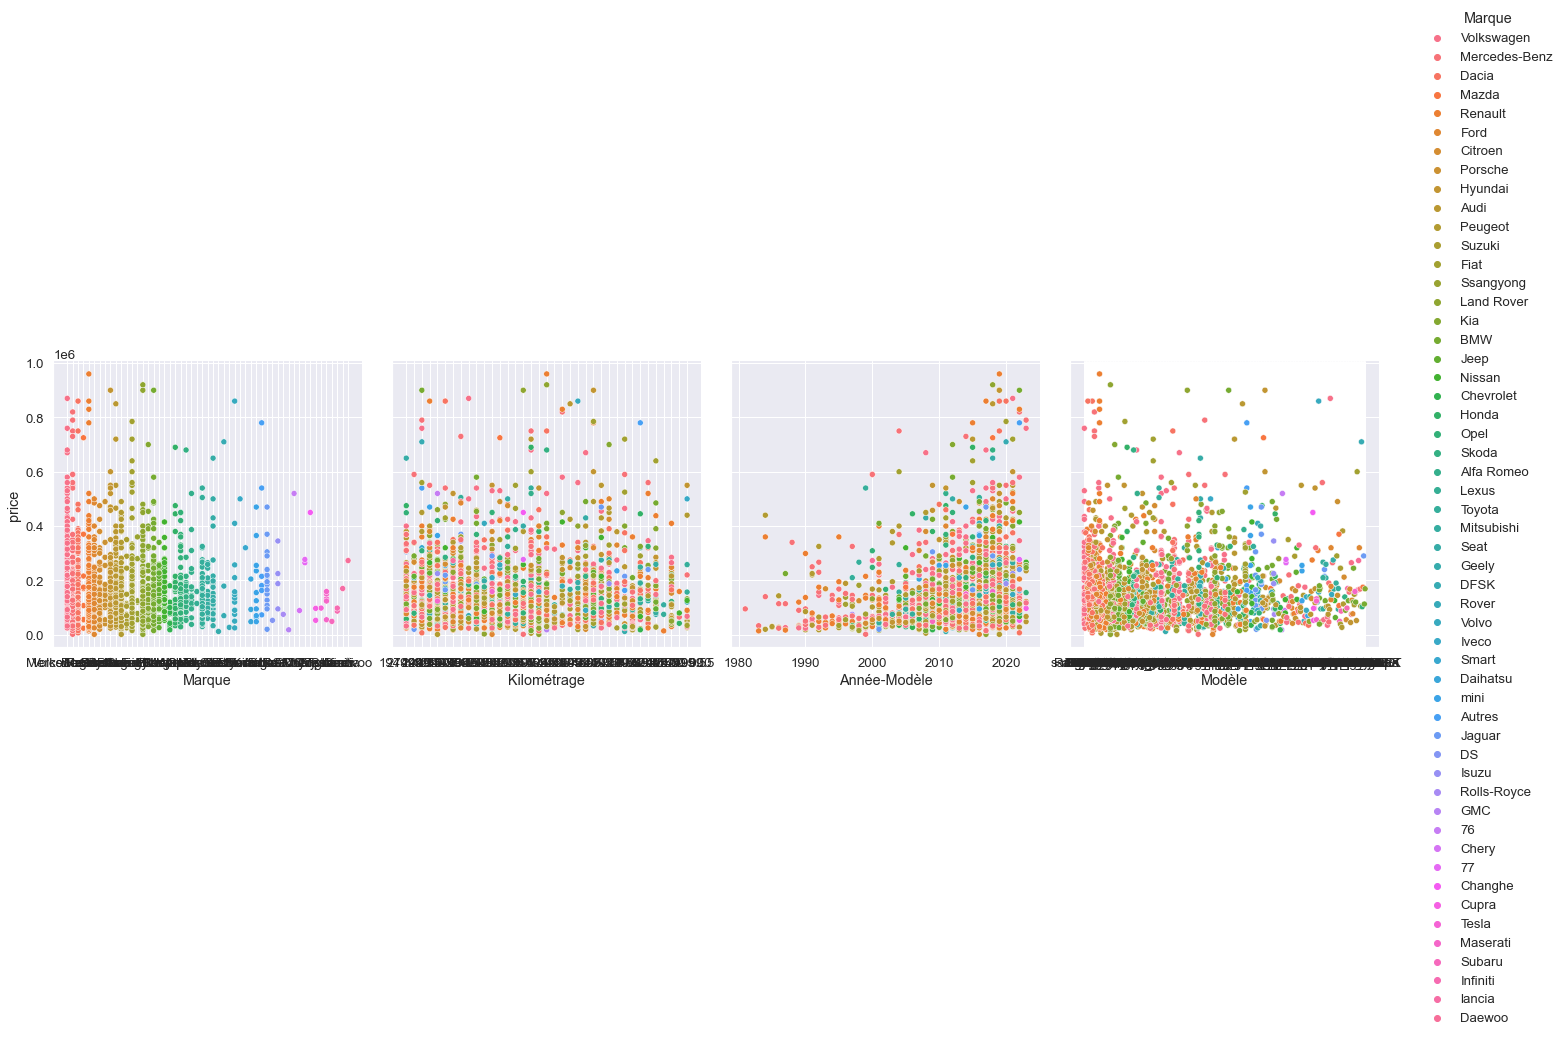

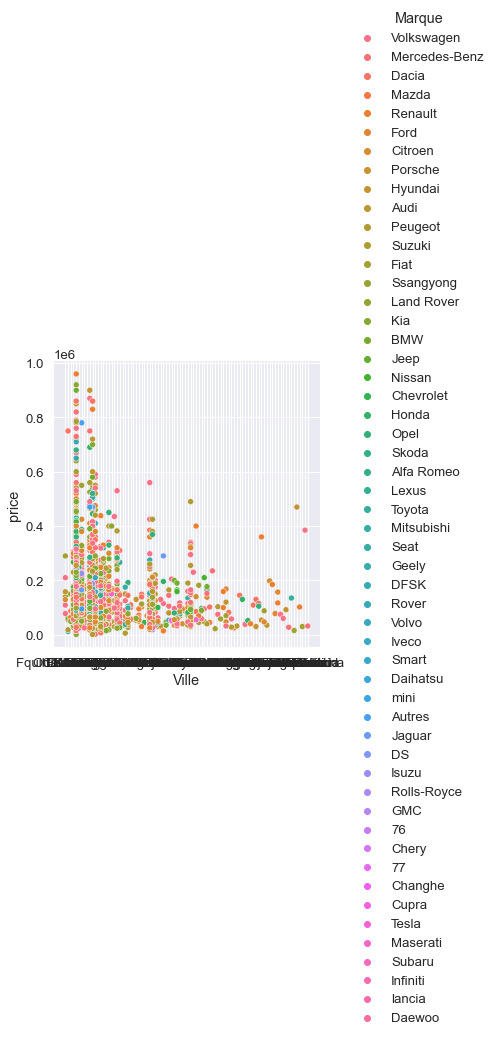

In [186]:
columns = ['Marque', 'Kilométrage', 'Année-Modèle','Modèle','Ville']
n = 4
row_groups= [columns[i:i+n] for i in range(0, len(columns), n) ]
for i in row_groups:
    pp = sns.pairplot(data=df1, y_vars=['price'],x_vars=i, hue='Marque', height=5)

In [193]:
r2 = r2_score(y_train, y_pred)

print("R2 score:", r2)

R2 score: 0.41208816756201283
